# Project: E-commerce Sales Analysis
# Author: Soumik Adak
# Purpose: Interactive analysis of sales dataset with charts and insights


## Step 1: Import Libraries


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Load Data

In [46]:
df = pd.read_csv(r"E:\The Developers Arena\E-commerce Sales Analysis\sales_data.csv")

In [47]:
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


## Step 3: Explore Data

In [48]:
df.shape

(100, 7)

In [49]:
df.columns

Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')

In [50]:
df.dtypes

Date           object
Product        object
Quantity        int64
Price           int64
Customer_ID    object
Region         object
Total_Sales     int64
dtype: object

In [51]:
# Convert Date column to datetime type
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

In [52]:
# Verify conversion
df.dtypes

Date           datetime64[ns]
Product                object
Quantity                int64
Price                   int64
Customer_ID            object
Region                 object
Total_Sales             int64
dtype: object

### Check for missing values

In [53]:
df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [54]:
df.duplicated().sum()

0

## Step 4: Clean Data

In [55]:
# drop the null value
df = df.dropna()

In [56]:
# drop the duplicated value
df = df.drop_duplicates()

## Step 5: Basic Analysis

In [57]:
total_revenue = df["Total_Sales"].sum()
product_sales = df.groupby("Product")["Total_Sales"].sum()
regional_sales = df.groupby("Region")["Total_Sales"].sum()

In [58]:
print(f"Total Revenue: ₹{total_revenue:,.2f}")

Total Revenue: ₹12,365,048.00


In [59]:
print("Best-Selling Product:", product_sales.idxmax())

Best-Selling Product: Laptop


## Step 6: Visualizations

### Chart 1: Product Sales Bar Chart

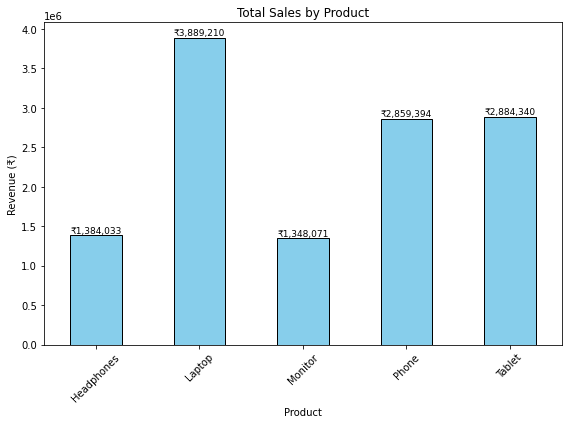

In [60]:
plt.figure(figsize=(8,6))
bars = product_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Product")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)

# Add data labels
for i, value in enumerate(product_sales):
    plt.text(i, value + 5000, f"₹{value:,.0f}", ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()


### Chart 2: Regional Sales Pie Chart

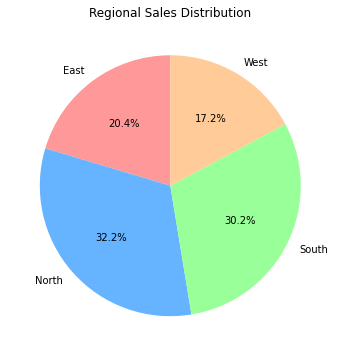

In [61]:
plt.figure(figsize=(6,6))
regional_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90,
                    colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Regional Sales Distribution")
plt.ylabel("")
plt.show()

### Chart 3: Sales Trend Over Time

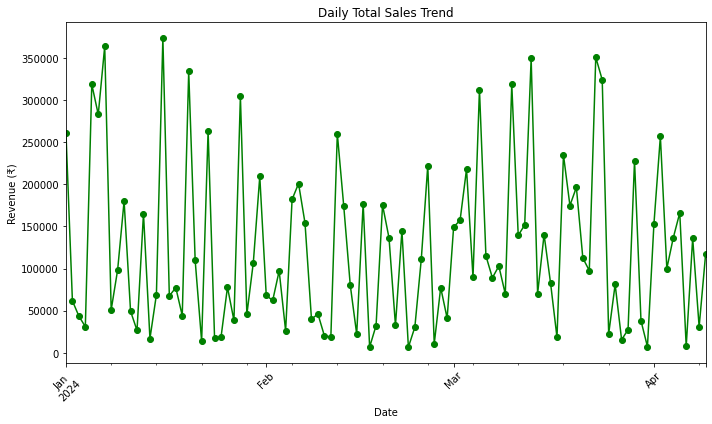

In [64]:
plt.figure(figsize=(10,6))
df.groupby("Date")["Total_Sales"].sum().plot(kind="line", marker="o", color="green")
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 E-commerce Sales Analysis Report

## Key Findings
- **Total Revenue:** ₹12,365,048.00 (calculated from dataset)
- **Best-Selling Product:** Laptop (highest cumulative sales)
- **Regional Sales Distribution:** North and South dominate revenue share.

## Insights
- Laptops are the primary revenue driver.
- Accessories (Headphones, Monitors) show consistent demand but lower revenue.
- Tablets show seasonal spikes, suggesting targeted promotions could boost sales.

## Next Steps
- Focus marketing efforts on laptops in high-performing regions.
- Explore opportunities to boost accessory sales.
- Investigate seasonal demand patterns for tablets.